In [94]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
import pandas as pd

# Set parameters and read the CSV file
degreePolyFit = 6
useElasticNet = False
data = pd.read_csv("speeds.csv")

In [95]:
# From an array of [[x], [y], [z] ...] => [[x^2, x^2, x^3...x^newDegree], y.., z...]
# From single value to polynimial of a given degree
def augmentSingleValueData(X, newDegree):
    Xaug = np.zeros((X.shape[0], newDegree))
    for row in range(X.shape[0]):
        val = X[row]
        Xaug[row] = np.array([pow(val,i) for i in range(1,newDegree+1)]).squeeze()
    return Xaug

#augmentSingleValueData(np.array([[1],[2],[3]]), 3)
    

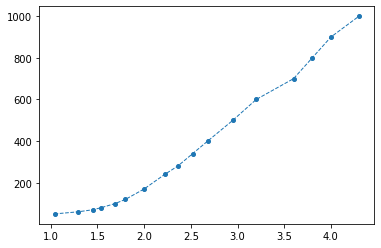

In [96]:
# Augment and fit the data from the csv file
X = data['SpeedObtained'].to_numpy().reshape(-1,1) * 0.01
y = data['TargetSpeed'].to_numpy() * 0.01
Xaug = augmentSingleValueData(X, degreePolyFit)

if useElasticNet:
    reg = ElasticNet(random_state=0).fit(Xaug,y)
else:
    reg = LinearRegression().fit(Xaug,y)

# Plot the input values
import matplotlib.pyplot as pyplot
pyplot.plot(X,y, marker='o', linestyle='dashed', linewidth=1,markersize=4)

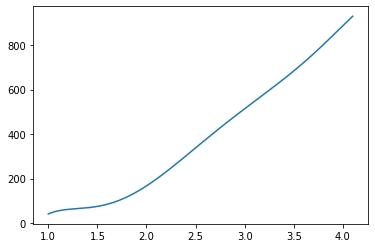

In [97]:
# Test the prediction
Inputs = np.array([[x] for x in np.linspace(1.0,4.1, 1000)])
InputsAug = augmentSingleValueData(Inputs, degreePolyFit)
Outputs = reg.predict(InputsAug)
pyplot.plot(Inputs, Outputs)

In [98]:
print("Coefficients after fitting algorithm:\n")
# Get the coefficients to save them and use in the code
print('x^0 -> {0:.6f}'.format(reg.intercept_))
for deg in range(0, degreePolyFit):
    print('x^{0} -> {1:.6f}'.format(deg+1,reg.coef_[deg]))

Coefficients:

x^0 -> -2522.520917
x^1 -> 7642.699933
x^2 -> -8924.105149
x^3 -> 5200.883118
x^4 -> -1584.463038
x^5 -> 243.846081
x^6 -> -14.967646


In [136]:
# Predict single value
#testInputs = np.array([[2]])
#testInputsAug = augmentSingleValueData(testInputs, degreePolyFit)
#testOutputs = reg.predict(testInputsAug)
#print(testOutputs)

[167.25993779]


In [124]:
# Write coefficients to file
# NUM x^0_coef, x^1_coef ..... x^NUM
from array import array
import struct
output_file = open('speedFactors.bin', 'wb')
numItems = (len(reg.coef_) + 1)
dataToSave = struct.pack('i'+'f'*numItems, numItems, reg.intercept_, *reg.coef_)
output_file.write(dataToSave)
output_file.close()

In [137]:
# Read test
input_file = open('speedFactors.bin', 'rb')

R = input_file.read()
num_items = struct.unpack('i', R[0:4])[0]
print("Num coefficients used: ", num_items)
R = R[4:]
items = struct.unpack('f'*num_items, R)
print("Coefficients written to file: ", items)

Num coefficients used:  7
Coefficients written to file:  (-2522.52099609375, 7642.69970703125, -8924.10546875, 5200.88330078125, -1584.4630126953125, 243.84608459472656, -14.967646598815918)
